In [54]:
import itertools
import warnings
from datetime import datetime

import geopandas
import numpy as np
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


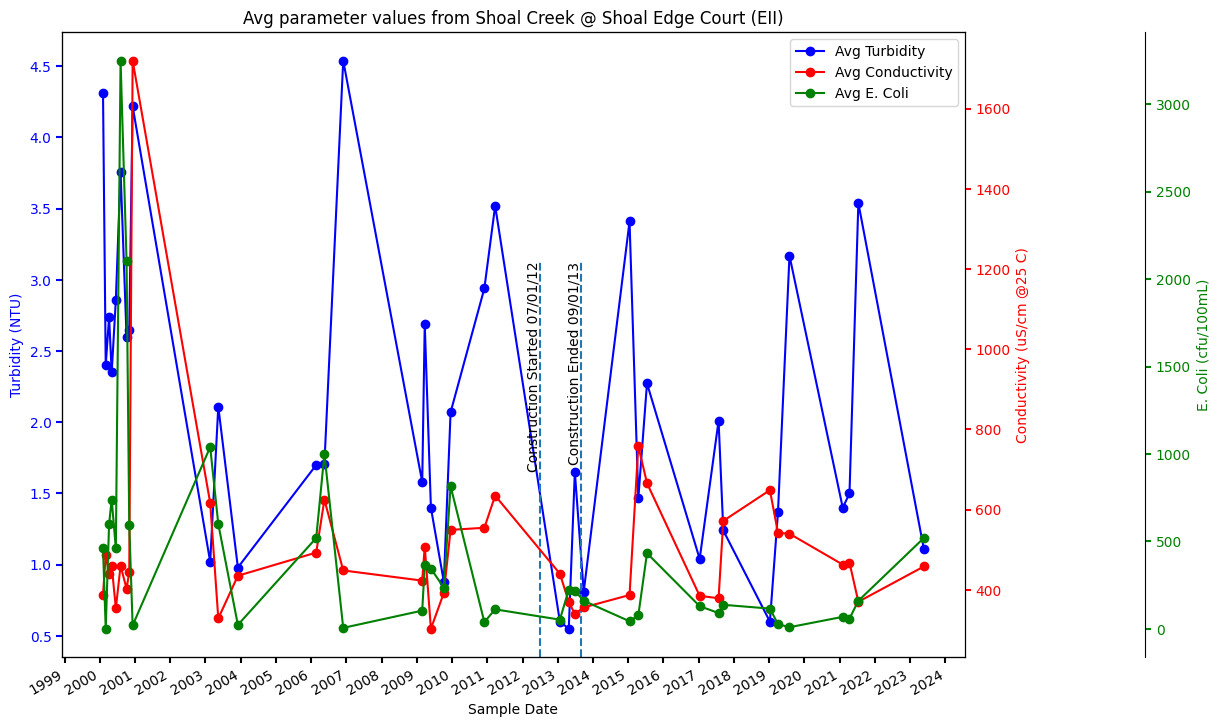

In [55]:
from plotting import plot_parameter_precip, plot_parameter
import intervals

parameters = [
    "turbidity",
    "conductivity",
    "ecoli"
]

shoal_edge_parameters = intervals.joined_parameters_query(parameters, [intervals.location_2222], intervals.Interval.DAILY)
shoal_edge_parameters = shoal_edge_parameters.dropna()
plot_parameter(shoal_edge_parameters, 'avg', f'Avg parameter values from {intervals.location_2222}')

In [56]:
pre_post_construction = intervals.query_parameters_before_after_construction_by_location(parameters, intervals.location_2222)
pre_post_construction.head(10)

,location,min_date,parameter,avg_value,stddev,max_value,median_value,geometry
0,Shoal Creek @ Shoal Edge Court (EII),2013-09-26,conductivity,524.309500,119.334320,759.00,514.65,POINT (620297.766 3356312.879)
1,Shoal Creek @ Shoal Edge Court (EII),2000-02-04,conductivity,500.400000,247.615766,1720.00,444.00,POINT (620297.766 3356312.879)
2,Shoal Creek @ Shoal Edge Court (EII),2013-09-26,ecoli,193.464444,234.926750,866.00,116.20,POINT (620297.766 3356312.879)
3,Shoal Creek @ Shoal Edge Court (EII),2000-02-04,ecoli,586.840741,734.108526,3250.00,365.40,POINT (620297.766 3356312.879)
4,Shoal Creek @ Shoal Edge Court (EII),2013-09-26,turbidity,1.741889,0.941910,5.30,1.40,POINT (620297.766 3356312.879)
5,Shoal Creek @ Shoal Edge Court (EII),2000-02-04,turbidity,2.271154,1.143686,4.54,2.23,POINT (620297.766 3356312.879)


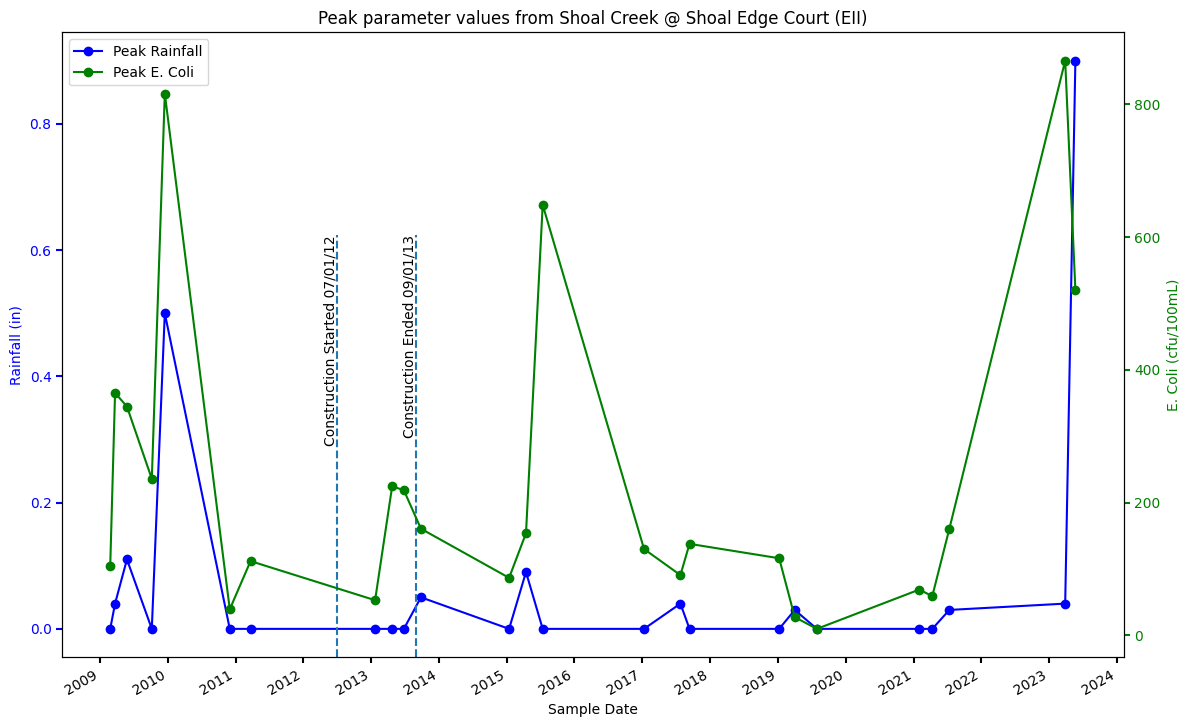

In [57]:
shoal_edge_ecoli_parameters = intervals.query_with_precip_daily("ecoli", intervals.location_2222)
shoal_edge_ecoli_parameters = shoal_edge_ecoli_parameters.dropna()
plot_parameter_precip(shoal_edge_ecoli_parameters, 'max', f'Peak parameter values from {intervals.location_2222}')